This Notebook generates the figures for the NER comparison.

In [1]:
# visualization packages
import matplotlib
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns

# other packages
import numpy as np
import os
import pandas as pd


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
STATS_DIR = "statistics" # directory where performance statistics is saved


In [3]:
# get statistics from file
def get_statistics(tool, filtered=False, abstract=False, cui=False, general=False):
    
    rounding = 2
    
    if filtered:
        filtered = "filtered_"
    else:
        filtered = ""
        
    if abstract:
        text = "_abstract"
    else:
        text = "_fulltext"
        
    if cui:
        cui = "_cui"
    else:
        cui = ""
        
    if general: 
        general = "_general"
    else:
        general = ""
        
    filename = filtered + tool + "_statistics" + text + cui + general + ".txt"
    stats = [0, 0, 0]
    with open(os.path.join(STATS_DIR, filename)) as f:
        for line in f:
            if "Precision = " in line:
                result = float(line.strip().replace("Precision = ", ""))
                stats[0] = round(result, rounding)
            elif "Recall = " in line:
                result = float(line.strip().replace("Recall = ", ""))
                stats[1] = round(result, rounding)
            elif "F-Measure = " in line:
                result = float(line.strip().replace("F-Measure = ", ""))
                stats[2] = round(result, rounding)
            else:
                pass
            
            
    return stats

In [4]:
# get statistics from file
def get_statistics_all(tool, filtered=False, abstract=False, cui=False, general=False):
    
    rounding = 2
    
    if filtered:
        filtered = "filtered_"
    else:
        filtered = ""
        
    if abstract:
        text = "_abstract"
    else:
        text = "_fulltext"
        
    if cui:
        cui = "_cui"
    else:
        cui = ""
        
    if general: 
        general = "_general"
    else:
        general = ""
        
    filename = filtered + tool + "_statistics" + text + cui + general + ".txt"
    stats = [0, 0, 0, 0, 0, 0]
    with open(os.path.join(STATS_DIR, filename)) as f:
        for line in f:
            if "Number of true positives = " in line:
                result = float(line.strip().replace("Number of true positives = ", ""))
                stats[0] = round(result, rounding)
            elif "Number of positive labels = " in line:
                result = float(line.strip().replace("Number of positive labels = ", ""))
                stats[1] = round(result, rounding)
            elif "Number of positive predictions = " in line:
                result = float(line.strip().replace("Number of positive predictions = ", ""))
                stats[2] = round(result, rounding)
            elif "Precision = " in line:
                result = float(line.strip().replace("Precision = ", ""))
                stats[3] = round(result, rounding)
            elif "Recall = " in line:
                result = float(line.strip().replace("Recall = ", ""))
                stats[4] = round(result, rounding)
            elif "F-Measure = " in line:
                result = float(line.strip().replace("F-Measure = ", ""))
                stats[5] = round(result, rounding)
            else:
                pass
            
            
    return stats

In [5]:
col_pal = sns.color_palette("Set3")

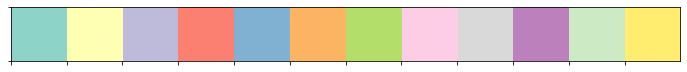

In [6]:
sns.palplot(col_pal)

In [7]:
# for the full-texts table

clamp = get_statistics_all("clamp", filtered=False, abstract=False)
clamp_filtered = get_statistics_all("clamp", filtered=True, abstract=False)
ctakes = get_statistics_all("ctakes", filtered=False, abstract=False)
ctakes_filtered = get_statistics_all("ctakes", filtered=True, abstract=False)
metamap = get_statistics_all("metamap", filtered=False, abstract=False)
metamap_filtered = get_statistics_all("metamap", filtered=True, abstract=False)

table1 = [clamp, clamp_filtered, ctakes, ctakes_filtered, metamap, metamap_filtered]
table1_df = pd.DataFrame(table1)
table1_df.to_csv("table1.csv", index=False)

In [8]:
# for the abstracts table

clamp = get_statistics_all("clamp", filtered=False, abstract=True)
clamp_filtered = get_statistics_all("clamp", filtered=True, abstract=True)
ctakes = get_statistics_all("ctakes", filtered=False, abstract=True)
ctakes_filtered = get_statistics_all("ctakes", filtered=True, abstract=True)
metamap = get_statistics_all("metamap", filtered=False, abstract=True)
metamap_filtered = get_statistics_all("metamap", filtered=True, abstract=True)

table2 = [clamp, clamp_filtered, ctakes, ctakes_filtered, metamap, metamap_filtered]
table2_df = pd.DataFrame(table2)
table2_df.to_csv("table2.csv", index=False)

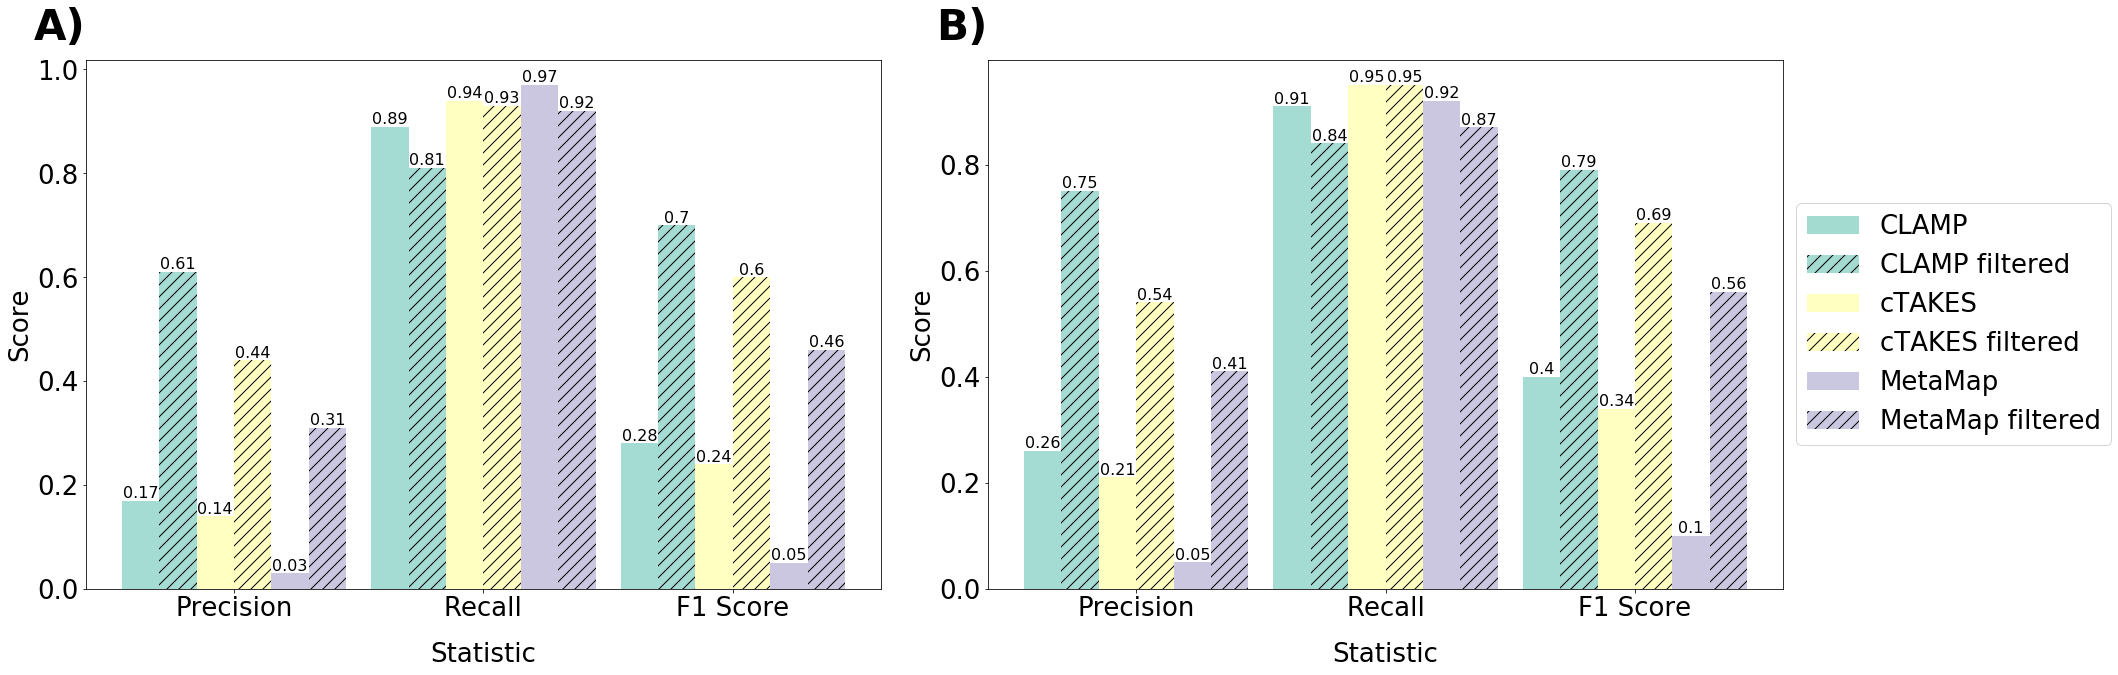

In [9]:
matplotlib.rcParams.update({'font.size': 26})

num_groups = 3
index = np.arange(num_groups)

bar_width = 0.15
opacity = 0.8

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,10))

# full-text subplot
# statistics for full-texts
# clamp = [20.4, 89.2, 33.3]
# clamp_filtered = [63.5, 81.8, 71.5]
# ctakes = [13.5, 94.3, 23.6]
# ctakes_filtered = [42.8, 92.8, 58.5]
# metamap = [2.77, 97.8, 5.38]
# metamap_filtered = [30.5, 94.1, 46.1]

clamp = get_statistics("clamp", filtered=False, abstract=False)
clamp_filtered = get_statistics("clamp", filtered=True, abstract=False)
ctakes = get_statistics("ctakes", filtered=False, abstract=False)
ctakes_filtered = get_statistics("ctakes", filtered=True, abstract=False)
metamap = get_statistics("metamap", filtered=False, abstract=False)
metamap_filtered = get_statistics("metamap", filtered=True, abstract=False)

distribution_list = [clamp, clamp_filtered, ctakes, ctakes_filtered, metamap, metamap_filtered]
distribution_labels = ["CLAMP", "CLAMP filtered", "cTAKES", "cTAKES filtered", "MetaMap", "MetaMap filtered"]
distribution_colors = [col_pal[0], col_pal[0], col_pal[1], col_pal[1], col_pal[2], col_pal[2]]

for i, distribution in enumerate(distribution_list):
    rects = ax1.bar(index + i*bar_width, distribution, bar_width, alpha=opacity, color=distribution_colors[i], label=distribution_labels[i])
    for j, rect in enumerate(rects):
        ax1.text(rect.get_x() + rect.get_width()/2.0, rect.get_height(), str(distribution[j]), ha='center', va='bottom', fontsize=16)
        if i % 2 == 1:
            rect.set_hatch("//")
        
ax1.set_xlabel('Statistic')
x_tick_labels = ["Precision", "Recall", "F1 Score"]
x_ticks = index + (bar_width*(len(distribution_list)-1))/2

color = 'black'
ax1.set_ylabel("Score", color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(x_ticks)
ax1.set_xticklabels(x_tick_labels)
ax1.xaxis.set_label_coords(0.5, -0.1)

ax1.text(0, 1.1, "A)", transform=ax1.transAxes, fontsize=42, fontweight='bold', va='top', ha='right')



# abstract subplot
# statistics for abstracts
# clamp = [32.2, 90.6, 47.5]
# clamp_filtered = [75.6, 83.8, 79.5]
# ctakes = [20.7, 95.4, 34.0]
# ctakes_filtered = [53.3, 95.3, 68.4]
# metamap = [5.33, 92.4, 10.1]
# metamap_filtered = [40.6, 86.9, 55.3]
clamp = get_statistics("clamp", filtered=False, abstract=True)
clamp_filtered = get_statistics("clamp", filtered=True, abstract=True)
ctakes = get_statistics("ctakes", filtered=False, abstract=True)
ctakes_filtered = get_statistics("ctakes", filtered=True, abstract=True)
metamap = get_statistics("metamap", filtered=False, abstract=True)
metamap_filtered = get_statistics("metamap", filtered=True, abstract=True)

distribution_list = [clamp, clamp_filtered, ctakes, ctakes_filtered, metamap, metamap_filtered]
distribution_labels = ["CLAMP", "CLAMP filtered", "cTAKES", "cTAKES filtered", "MetaMap", "MetaMap filtered"]
distribution_colors = [col_pal[0], col_pal[0], col_pal[1], col_pal[1], col_pal[2], col_pal[2]]

for i, distribution in enumerate(distribution_list):
    rects = ax2.bar(index + i*bar_width, distribution, bar_width, alpha=opacity, color=distribution_colors[i], label=distribution_labels[i])
    for j, rect in enumerate(rects):
        ax2.text(rect.get_x() + rect.get_width()/2.0, rect.get_height(), str(distribution[j]), ha='center', va='bottom', fontsize=16)
        if i % 2 == 1:
            rect.set_hatch("//")
        
ax2.set_xlabel('Statistic')
x_tick_labels = ["Precision", "Recall", "F1 Score"]
x_ticks = index + (bar_width*(len(distribution_list)-1))/2

color = 'black'
ax2.set_ylabel("Score", color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.set_xticks(x_ticks)
ax2.set_xticklabels(x_tick_labels)

ax2.text(0, 1.1, "B)", transform=ax2.transAxes, fontsize=42, fontweight='bold', va='top', ha='right')
ax2.xaxis.set_label_coords(0.5, -0.1)

fig.tight_layout()

save_fig = True
fig_title = "figure2"
if save_fig:
    FIGURES_DIR = 'figures'
    plt.savefig(FIGURES_DIR + "/" + fig_title + ".png", dpi=300)
plt.show()

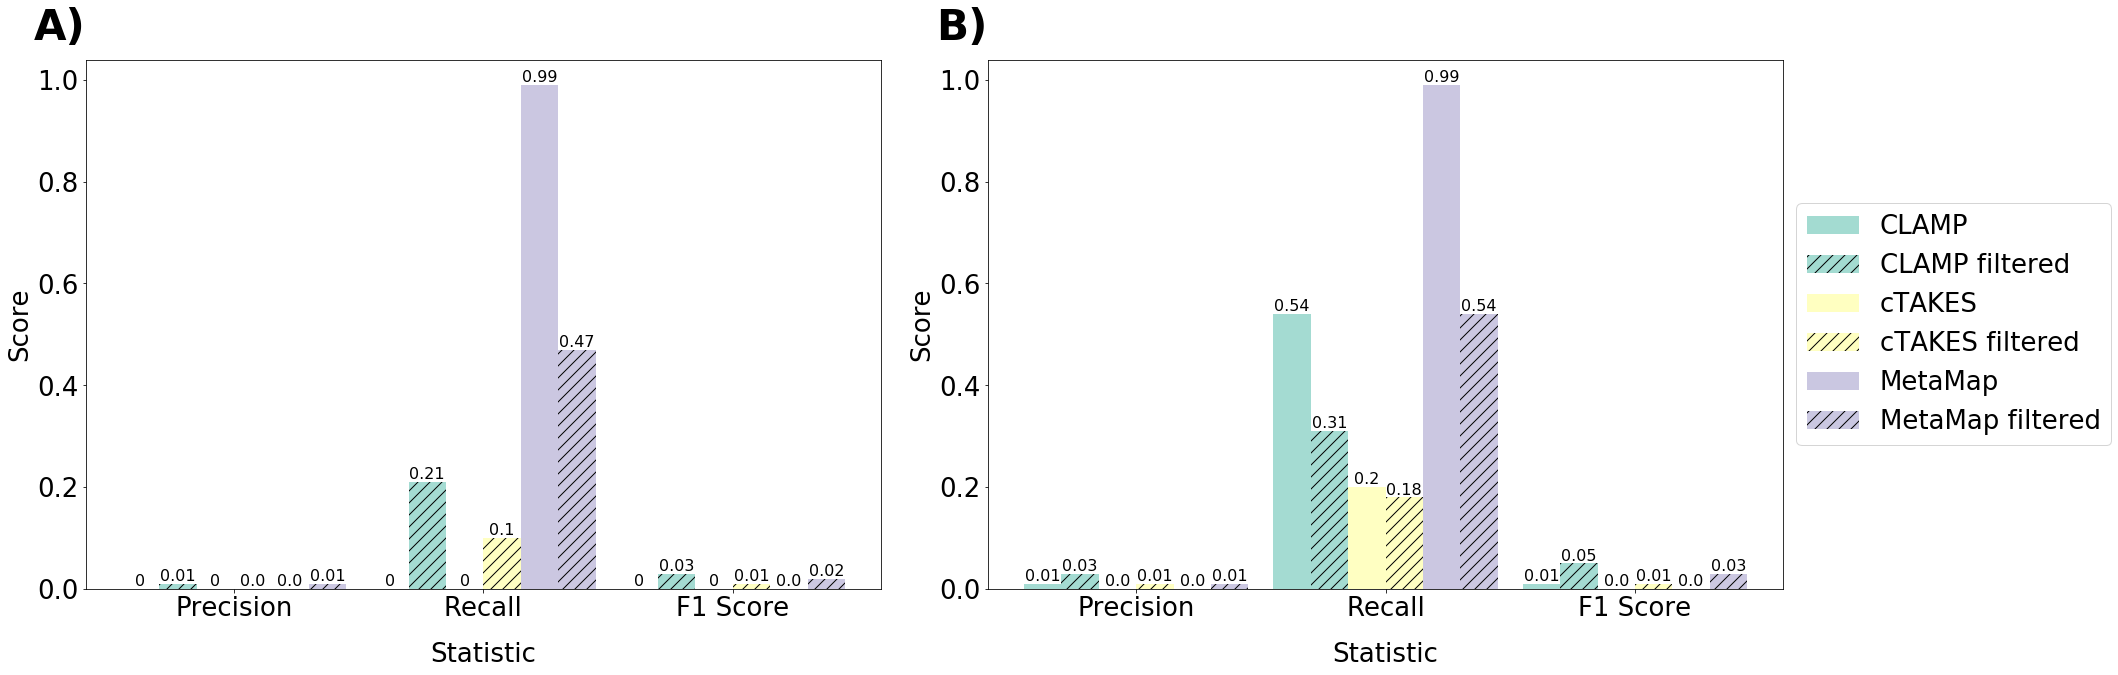

In [10]:
matplotlib.rcParams.update({'font.size': 26})

num_groups = 3
index = np.arange(num_groups)

bar_width = 0.15
opacity = 0.8

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,10))

# full-text subplot
# statistics for full-texts
# clamp = [20.4, 89.2, 33.3]
# clamp_filtered = [63.5, 81.8, 71.5]
# ctakes = [13.5, 94.3, 23.6]
# ctakes_filtered = [42.8, 92.8, 58.5]
# metamap = [2.77, 97.8, 5.38]
# metamap_filtered = [30.5, 94.1, 46.1]

clamp = get_statistics("clamp", filtered=False, abstract=False, general=True)
clamp_filtered = get_statistics("clamp", filtered=True, abstract=False, general=True)
ctakes = get_statistics("ctakes", filtered=False, abstract=False, general=True)
ctakes_filtered = get_statistics("ctakes", filtered=True, abstract=False, general=True)
metamap = get_statistics("metamap", filtered=False, abstract=False, general=True)
metamap_filtered = get_statistics("metamap", filtered=True, abstract=False, general=True)

distribution_list = [clamp, clamp_filtered, ctakes, ctakes_filtered, metamap, metamap_filtered]
distribution_labels = ["CLAMP", "CLAMP filtered", "cTAKES", "cTAKES filtered", "MetaMap", "MetaMap filtered"]
distribution_colors = [col_pal[0], col_pal[0], col_pal[1], col_pal[1], col_pal[2], col_pal[2]]

for i, distribution in enumerate(distribution_list):
    rects = ax1.bar(index + i*bar_width, distribution, bar_width, alpha=opacity, color=distribution_colors[i], label=distribution_labels[i])
    for j, rect in enumerate(rects):
        ax1.text(rect.get_x() + rect.get_width()/2.0, rect.get_height(), str(distribution[j]), ha='center', va='bottom', fontsize=16)
        if i % 2 == 1:
            rect.set_hatch("//")
        
ax1.set_xlabel('Statistic')
x_tick_labels = ["Precision", "Recall", "F1 Score"]
x_ticks = index + (bar_width*(len(distribution_list)-1))/2

color = 'black'
ax1.set_ylabel("Score", color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(x_ticks)
ax1.set_xticklabels(x_tick_labels)
ax1.xaxis.set_label_coords(0.5, -0.1)

ax1.text(0, 1.1, "A)", transform=ax1.transAxes, fontsize=42, fontweight='bold', va='top', ha='right')



# abstract subplot
# statistics for abstracts
# clamp = [32.2, 90.6, 47.5]
# clamp_filtered = [75.6, 83.8, 79.5]
# ctakes = [20.7, 95.4, 34.0]
# ctakes_filtered = [53.3, 95.3, 68.4]
# metamap = [5.33, 92.4, 10.1]
# metamap_filtered = [40.6, 86.9, 55.3]
clamp = get_statistics("clamp", filtered=False, abstract=True, general=True)
clamp_filtered = get_statistics("clamp", filtered=True, abstract=True, general=True)
ctakes = get_statistics("ctakes", filtered=False, abstract=True, general=True)
ctakes_filtered = get_statistics("ctakes", filtered=True, abstract=True, general=True)
metamap = get_statistics("metamap", filtered=False, abstract=True, general=True)
metamap_filtered = get_statistics("metamap", filtered=True, abstract=True, general=True)

distribution_list = [clamp, clamp_filtered, ctakes, ctakes_filtered, metamap, metamap_filtered]
distribution_labels = ["CLAMP", "CLAMP filtered", "cTAKES", "cTAKES filtered", "MetaMap", "MetaMap filtered"]
distribution_colors = [col_pal[0], col_pal[0], col_pal[1], col_pal[1], col_pal[2], col_pal[2]]

for i, distribution in enumerate(distribution_list):
    rects = ax2.bar(index + i*bar_width, distribution, bar_width, alpha=opacity, color=distribution_colors[i], label=distribution_labels[i])
    for j, rect in enumerate(rects):
        ax2.text(rect.get_x() + rect.get_width()/2.0, rect.get_height(), str(distribution[j]), ha='center', va='bottom', fontsize=16)
        if i % 2 == 1:
            rect.set_hatch("//")
        
ax2.set_xlabel('Statistic')
x_tick_labels = ["Precision", "Recall", "F1 Score"]
x_ticks = index + (bar_width*(len(distribution_list)-1))/2

color = 'black'
ax2.set_ylabel("Score", color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.set_xticks(x_ticks)
ax2.set_xticklabels(x_tick_labels)

ax2.text(0, 1.1, "B)", transform=ax2.transAxes, fontsize=42, fontweight='bold', va='top', ha='right')
ax2.xaxis.set_label_coords(0.5, -0.1)

fig.tight_layout()

save_fig = True
fig_title = "figure2_general"
if save_fig:
    FIGURES_DIR = 'figures'
    plt.savefig(FIGURES_DIR + "/" + fig_title + ".png", dpi=300)
plt.show()